Authors: Ata Akbari Asanjan<br>
&emsp;&emsp;&emsp;&emsp;Lucas Brady (lucas.t.brady@nasa.gov)<br>
&emsp;&emsp;&emsp;&emsp;Aaron P. Lott (aaron.lott@nasa.gov)

Copyright © 2023, United States Government, as represented by the Administrator
of the National Aeronautics and Space Administration. All rights reserved.

The *PySA*, a powerful tool for solving optimization problems is licensed under
the Apache License, Version 2.0 (the "License"); you may not use this file
except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0. 

Unless required by applicable law or agreed to in writing, software distributed
under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR
CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

# Ising solver example for PySA

In this tutorial, we will show two types of Ising solvers to solve a 2D ising field. Respectively, the two methods are:
1. Metropolis sampler
2. PySA sampler


### What is a Ising model?
- Ising models are mathematical models used to study ferromagnetic systems and has applications in various fields such as statistical mechanics, condensed matter physics, and materials science. 

- Ising models consist of a lattice of spins where each spin can be in either an "up" or "down" state. The energy of the system depends on the spin configuration, and the goal is to find the configuration with the lowest energy. 

- At each step of the algorithm, the solver proposes a change to the spin configuration, and calculates the change in energy. If the change in energy is negative, the new configuration is accepted. If the change in energy is positive, the new configuration is accepted with a probability proportional to the change in energy. This allows the solver to escape local minima and explore other regions of the spin configuration space.

### Mathematical formulation of Ising models

The Ising model is a mathematical model in statistical mechanics used to describe the behavior of ferromagnetic materials. The key equation in the Ising model is the Hamiltonian, which describes the total energy of the system:

$$H = -J * \sum_{i,j}^{N} s_{i}s_{j}$$

where $J$ is the exchange interaction strength, $s_{i}$ is the spin of a particle at site $i$, and the sum is taken over all particle pairs.

The state of the system can be described by a lattice of spins $s_{i}$, which can be either +1 or -1. The total energy of the system is given by the Hamiltonian, which takes into account the interaction between all pairs of spins.

In [1]:
from ising_tutorial import *
import matplotlib.pyplot as plt

# Ising model with Metropolis solver

## Metropolis solver
- The Metropolis algorithm is a Monte Carlo method used to simulate the Ising model.
- Metropolis solver uses a random walk approach to search for the minimum energy configuration.
- Metropolis solver is a simple and efficient method for solving the Ising Model, and has been widely used in various studies of magnetic systems.
- It provides a valuable tool for understanding the properties of ferromagnetic materials and has applications in a variety of fields such as computer simulation, materials science, and condensed matter physics.

### How Metropolis works?

The algorithm involves randomly choosing a spin in the lattice and flipping it, and then accepting or rejecting the change based on the change in energy. If the energy decreases, the change is accepted. If the energy increases, the change is accepted with a probability proportional to $e^{-\Delta E/k_{B}T}$, where $k_{B}$ is Boltzmann's constant and $T$ is the temperature.

By repeating this process many times, the Metropolis algorithm can generate a sample of the equilibrium distribution for the Ising model, which can be used to calculate various properties of the system, such as the average magnetization and the specific heat.

### Metropolis psuedo-code
Pseudo-code for the Metropolis Solver for the Ising Model:

1. Initialize the lattice with random spins (up or down)
2. Choose a random lattice site
3. Calculate the change in energy if the spin of the chosen site is flipped
4. If the change in energy is negative, flip the spin
5. If the change in energy is positive, flip the spin with a probability equal to $e^(-ΔE/T)$, where $T$ is the temperature
6. Repeat steps 2-5 for a specified number of iterations or until the system reaches thermal equilibrium
7. Repeat the entire process for different temperatures to obtain a phase diagram


### Implementation
The first example is an Ising model with a _16x16_ lattice that has an internal interaction magnitude of _1_ and no external magnetic field.
The Ising field updates given temperature (=_10_ here), number of updates (sweeps=_10000_), and a evolution snapshot every _1000_ sweeps. We can visualize the chain evolution by running the following block.

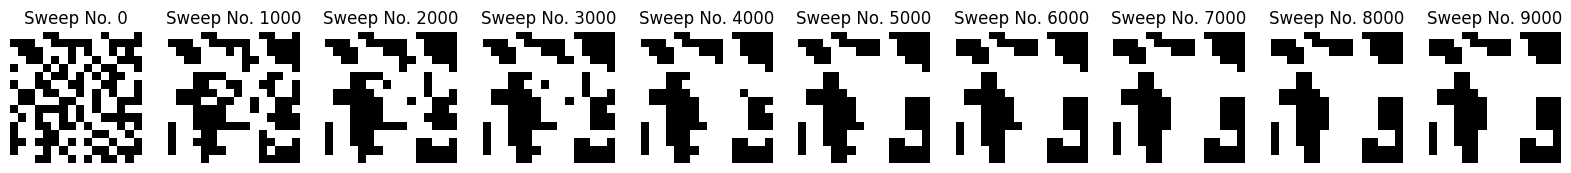

In [2]:
# How to test Ising model via simple MCMC

# Without external magnetic forces
size = [16, 16]
ising = Ising2DwithMetroplis(size=size, interaction=1, magnetic_field=None)
_ising = ising._lattice.copy()
hist = ising.update(temperature=10, sweeps=10000, verbose=False, intervals=1000)

plt.figure(figsize=(20, 2))
for i in range(len(hist)):
    plt.subplot(1, len(hist), i+1)
    plt.imshow(hist[i], interpolation='none', cmap='gray')
    plt.title(f"Sweep No. {i*1000}")
    plt.axis("off")

plt.show()

## Ising model with external magnetic field

The Ising model with an external magnetic field describes a system of classical magnetic spins that can either point "up" or "down". The system is subjected to an external magnetic field, represented by the parameter $f$, which influences the orientation of the spins. The energy of the system is determined by the interaction between spins, represented by the parameter $J$, and the external magnetic field. The Ising model is used to study phase transitions and magnetic properties of materials.

Given an $N \times N$ lattice of spins, the Hamiltonian for the Ising model with an external magnetic field can be written as:

$$ H = -J \sum\limits_{i,j}^{N} s_i s_j - \mu * f \sum\limits_{i}^{N} s_i $$

where $s_i$ is the spin at site $i$, $J$ is the interaction strength between spins, and $f$ is the external magnetic field. The first term in the equation represents the interaction between spins, with $J > 0$ corresponding to ferromagnetic interaction and $J < 0$ corresponding to antiferromagnetic interaction. The second term represents the interaction between each spin and the external magnetic field applied with a coefficient ($\mu$).

The Metropolis algorithm can be used to sample from the Boltzmann distribution to obtain the thermodynamic properties of the Ising model with an external magnetic field. 


### Metropolis psuedo-code for Ising model with external magnetic field
1. Initialize the lattice with a random spin configuration.
2. Select a spin at random and flip its orientation.
3. Calculate the change in energy, $\Delta H$, due to the spin flip.
4. If $\Delta H \leq 0$, accept the flip. If $\Delta H > 0$, accept the flip with probability $e^{-\beta \Delta H}$, where $\beta = \frac{1}{k_B T}$ and $k_B$ is the Boltzmann constant.
5. Repeat steps 2-4 for a sufficient number of iterations to obtain accurate thermodynamic properties.
6. This procedure is repeated for different values of the external magnetic field $f$ and temperature $T$ to obtain the magnetic and thermodynamic properties of the system.

### Implementation

We implemented the same Ising model as the previous example, however, we added an external force in the shape of a square (figure below). The Ising model will train similar to previous case with the additional Hamiltonia clause of  with a weight of $\mu$=_0.75_.

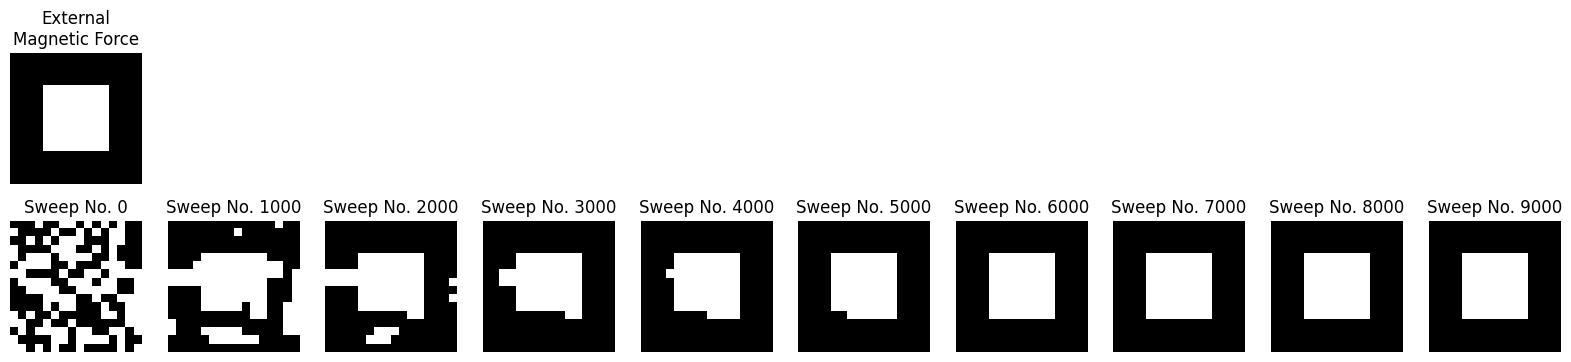

In [3]:
# # # # With external magnetic forces
size = [16, 16]
external_force = np.ones(size) * -1
external_force[size[0]//4:(3*size[0]//4), size[1]//4:(3*size[1]//4)] = 1

ising = Ising2DwithMetroplis(size=size, interaction=1, magnetic_field=external_force, mu=0.75)
hist = ising.update(temperature=10, sweeps=40000, verbose=False, intervals=4000)

plt.figure(figsize=(20, 4))
plt.subplot(2, len(hist), 1)
plt.imshow(external_force, interpolation='none', cmap='gray')
plt.title("External\nMagnetic Force")
plt.axis("off")

for i in range(len(hist)):
    plt.subplot(2, len(hist), i+1+len(hist))
    plt.imshow(hist[i], interpolation='none', cmap='gray')
    plt.title(f"Sweep No. {i*1000}")
    plt.axis("off")

plt.show()

## Ising model with PySA solver

The Ising model with parallel tempering solver is a popular approach for simulating the behavior of magnetic materials in physics and statistical mechanics. Parallel tempering solver is used to more efficiently sample the system's state space.

The parallel tempering solver involves simulating multiple replicas of the system at different temperatures, and swapping configurations between replicas to explore the state space more efficiently. At each temperature, the system is simulated using the Metropolis algorithm, which accepts or rejects spin flips based on the change in energy caused by the flip.

### PySA solver psuedo-code

1. Initialize $n$ replicas of the system, each at a different temperature.
2. For each replica, simulate the system for a set number of steps using the Metropolis algorithm.
3. After each simulation step, perform a swap between two randomly selected replicas. The swap is accepted or rejected based on the change in energy caused by the swap.
4. Repeat steps 2-3 until the desired number of total steps has been reached.
5. By running multiple replicas at different temperatures, the parallel tempering solver can overcome some of the limitations of the Metropolis algorithm, such as getting stuck in local minima and slow convergence in systems with multiple phases. The parallel tempering solver has been successfully applied to a wide range of systems in physics and statistical mechanics, and is a powerful tool for exploring the behavior of magnetic materials.

### Implementation
Our implementation of PySA solver is a bit different that Metropolis solver. In Metrpolis solver above, we get the chain evolutions as the `.update` outputs. In PySA solver, the outputs represent the final states of $N_{read}$ we call.

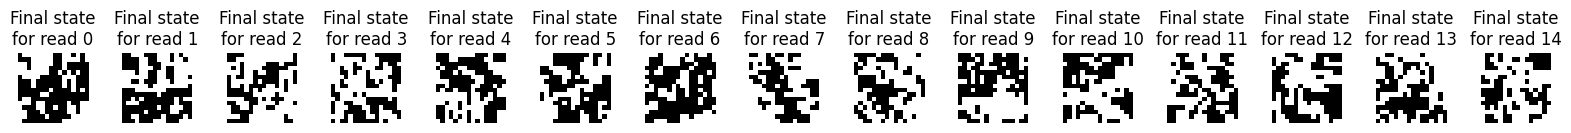

In [4]:
# How to test Ising model via PySA

size = [16, 16]
external_force = None
ising_pysa = Ising2DwithPySA(size=size, interaction=1, magnetic_field=external_force)
ising_pysa._lattice = ising._lattice
state_reads = ising_pysa.update(temp_range=[1.0, 3.5], sweeps=400, reads=15, replicas=10, verbose=False)

plt.figure(figsize=(20, 2))
for i in range(len(state_reads)):
    plt.subplot(2, len(state_reads), i+1+len(state_reads))
    plt.imshow(state_reads[i], interpolation='none', cmap='gray')
    plt.title(f"Final state\nfor read {i}")
    plt.axis("off")

plt.show()

## Ising model with PySA solver with external magnetic force

Similar to previous implementation of external force in Metrpolis, we create an external magnetic force in the shape of an square.

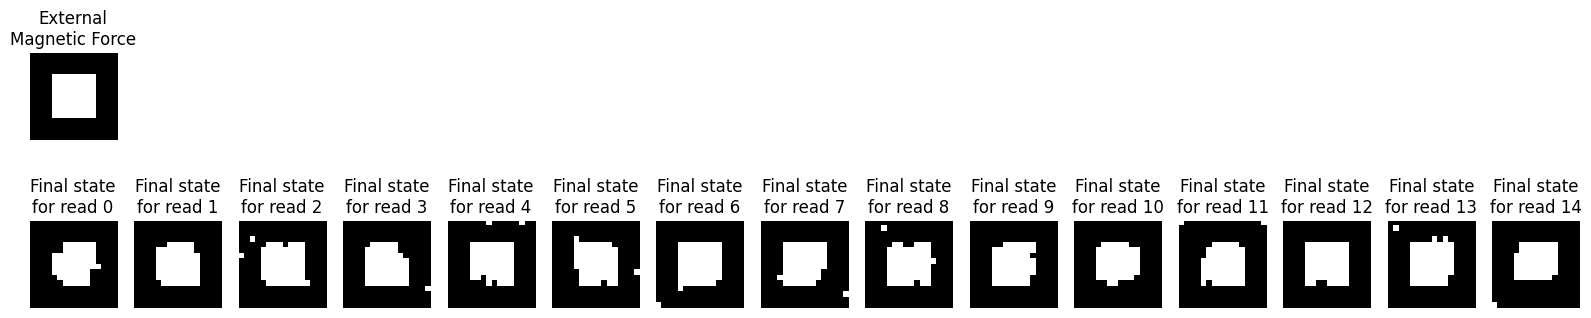

In [5]:
# # # # With external magnetic forces
size= [16, 16]
external_force = np.ones(size) * -1
external_force[size[0]//4:(3*size[0]//4), size[1]//4:(3*size[1]//4)] = 1
ising = Ising2DwithPySA(size=size, interaction=1, magnetic_field=external_force, mu=0.75)
state_reads = ising.update(temp_range=[1.0, 1.5], sweeps=4000, reads=15, replicas=10, verbose=False)

plt.figure(figsize=(20, 4))
plt.subplot(2, len(state_reads), 1)
plt.imshow(external_force, interpolation='none', cmap='gray')
plt.title("External\nMagnetic Force")
plt.axis("off")

for i in range(len(state_reads)):
    plt.subplot(2, len(state_reads), i+1+len(state_reads))
    plt.imshow(state_reads[i], interpolation='none', cmap='gray')
    plt.title(f"Final state\nfor read {i}")
    plt.axis("off")

plt.show()

Additionally, we can call the `Jij` matrix for `Ising2DwithPySA` and visualize it as follows.

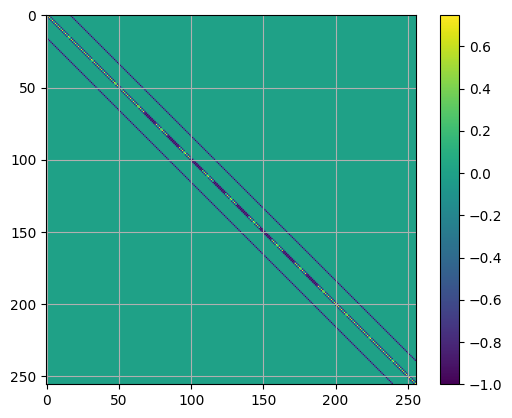

In [6]:
plt.imshow(ising.problem)
plt.colorbar()
plt.grid()
plt.show()